Things to do: sentiment analysis of most recent 100 tweets of various news orgs

Initialize lots of empty lists

(build a function?)

* For one news org:
* Pull 100 last tweets (or pull 1 at a time, 100 times?)
** See 1-Solved-StuGetRelief for looping through 100
* Run each through Vader
* Collect: text, date, compound, pos, neg, neut; add to respective lists
* Average compounds for each news org; add to compound average list
* Clear lists


DF of lists

PLOT 1
* Actually 5 plots
* ?? How to number Tweets Ago? Need a column for this? Or use Pandas index?)*
* Plot compounds


PLOT 2
* Zip News org keys with compound average list into dict
* Create DF

* Build data frame of lists


Export to CSV, Save plots as PNG


In [5]:
# Import Dependencies

import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [6]:
# # Target User Account
# target_user = "@CNN"

# # Counter
# counter = 1

# # # Loop through 5 pages of tweets (total 100 tweets)
# # for x in range(5):

# #     # Get all tweets from home feed
# public_tweets = api.user_timeline(target_user, count=100)

# # Loop through all tweets
# for tweet in public_tweets:

#     # Print Tweets
#     print(f'Tweet {counter}: {tweet["text"]}')

#     # Add to Counter
#     counter = counter + 1

In [14]:
# Target User Accounts
target_users = ("@BBC", "@CBS", "@CNN", "@FoxNews", "@NYT")

# Variable for holding sentiments
sentiments = []

#Variables for holding average Vader compound scores

# Loop through all target users
for target in target_users:

    # Variable for holding the oldest tweet
    #oldest_tweet = None
    counter = 0
    
    # Variables for holding sentiments
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []

#     # Loop through 5 pages of tweets (total 100 tweets)
#     for x in range(5):

    # Get all tweets from home feed
    public_tweets = api.user_timeline(target, count=100)

    # Loop through all tweets 
    for tweet in public_tweets:

        # Print Tweets
        #print("Tweet %s: %s" % (counter, tweet["text"]))

        # Run Vader Analysis on each tweet
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        tweets_ago = counter

        # Add sentiments for each tweet into an array
        sentiments.append({"Tweet": tweet["text"],
                           "News Org": target,
                           "Tweets Ago": counter,
                        "Date": tweet["created_at"], 
                       "Compound": compound,
                       "Positive": pos,
                       "Negative": neu,
                       "Neutral": neg})

        # Add to counter 
        counter = counter + 1

    #x+=1

In [15]:
# Convert sentiments to DataFrame
sentiments_pd = pd.DataFrame.from_dict(sentiments)

# Configure dataframe column order and display
sentiments_pd = sentiments_pd[['News Org',
                        'Tweets Ago',
                         'Date',
                         'Tweet',
                         'Compound',
                         'Positive',
                         'Neutral',
                         'Negative']]

In [16]:
# Save DataFrame as a csv

#sentiments_pd.to_csv("news_twitter_sentiments.csv", encoding="utf-8", index=False)

In [17]:
# james = sentiments_pd.groupby(["News Org"]).get_group("@CNN")["Tweets Ago"]
# #print(james)
# # james = list(james)
# #james.reverse()

# james.iloc[::-1]
# #print(james)

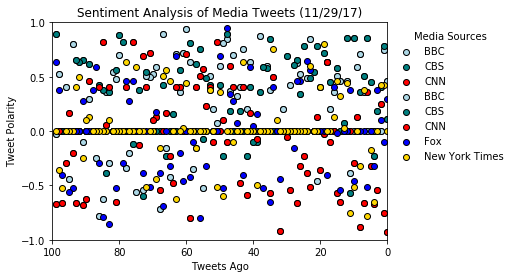

In [39]:
# Create overlaid scatterplots news organizations' compound scores
# bbc = , cbs = teal, cnn = tomato or orangered, fox = blue, nyt = gold

# cnn = plt.scatter(sentiments_pd.groupby(["News Org"]).get_group("@CNN")["Tweets Ago"],
#                 sentiments_pd.groupby(["News Org"]).get_group("@CNN")["Compound"],
#                   facecolors='red', edgecolors='black', label="CNN")
#target_users = ("@BBC", "@CBS", "@CNN", "@FoxNews", "@NYT")


# use zip funtion to zip to lists... for org,color...enumerate keeps track of position in list.

orgs_colors_dict = {'@BBC':'lightblue',
                   '@CBS': 'teal',
                   '@CNN': 'red',
                   '@FoxNews': 'blue',
                   '@NYT': 'gold'}

plt.scatter(sentiments_pd.groupby(["News Org"]).get_group("@BBC")["Tweets Ago"],
                sentiments_pd.groupby(["News Org"]).get_group("@BBC")["Compound"],
                  facecolors=orgs_colors_dict['@BBC'], edgecolors='black', label="BBC")
plt.scatter(sentiments_pd.groupby(["News Org"]).get_group("@CBS")["Tweets Ago"],
                sentiments_pd.groupby(["News Org"]).get_group("@CBS")["Compound"],
                  facecolors=orgs_colors_dict['@CBS'], edgecolors='black', label="CBS")
plt.scatter(sentiments_pd.groupby(["News Org"]).get_group("@CNN")["Tweets Ago"],
                sentiments_pd.groupby(["News Org"]).get_group("@CNN")["Compound"],
                  facecolors=orgs_colors_dict['@CNN'], edgecolors='black', label="CNN")
plt.scatter(sentiments_pd.groupby(["News Org"]).get_group("@FoxNews")["Tweets Ago"],
                sentiments_pd.groupby(["News Org"]).get_group("@FoxNews")["Compound"],
                  facecolors=orgs_colors_dict['@FoxNews'], edgecolors='black', label="Fox")
plt.scatter(sentiments_pd.groupby(["News Org"]).get_group("@NYT")["Tweets Ago"],
                sentiments_pd.groupby(["News Org"]).get_group("@NYT")["Compound"],
                  facecolors=orgs_colors_dict['@NYT'], edgecolors='black', label="New York Times")

# Set textual properties
now = datetime.now()
now = now.strftime("%m/%d/%y")
plt.title(f'Sentiment Analysis of Media Tweets ({now})')
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")

# Configure axes
plt.xlim(100, 0)
plt.ylim(-1.0, 1.0)
yticks = [-1.0, -0.5, 0.0, 0.5, 1.0]
plt.yticks(yticks)

# Add Media Sources to legend and place next to chart
#plt.legend(handles=[bbc, cbs, cnn, fox, nyt], title="Media Sources", bbox_to_anchor=(1, 1), frameon=False)
plt.legend(title="Media Sources", bbox_to_anchor=(1, 1), frameon=False)

# plt.legend(loc="upper right")
#plt.legend(handles=[cnn], loc="center left", title="Media Sources", bbox_to_anchor=(1, 0.5))

#df.plot().legend(loc='center left', bbox_to_anchor=(1, 0.5))
# figtext(.95, .6, "Note:\nCircle size correlates with driver count per city.", rotation='horizontal')

plt.show()

In [35]:
#sentiments_pd.groupby(["News Org"]).get_group("@BBC")["Compound"]

orgs_colors_dict['@BBC']

'lightblue'

In [20]:
average_compound = sentiments_pd.groupby("News Org").mean()["Compound"]

compounds_df = pd.DataFrame({"Average Compound Score": average_compound})
compounds_df

,Average Compound Score
News Org,
@BBC,0.199538
@CBS,0.263535
@CNN,-0.050615
@FoxNews,-0.021379
@NYT,0.031622


In [28]:
#sentiments_pd.nu...

# Number of Unique Items
#item_count = combined_df["Item Name"].nunique()

orgs_count = sentiments_pd["News Org"].nunique()
orgs_count

5

In [29]:
#player_count= len(combined_df["SN"].unique())

orgs_names = sentiments_pd["News Org"].unique()
orgs_names

array(['@BBC', '@CBS', '@CNN', '@FoxNews', '@NYT'], dtype=object)

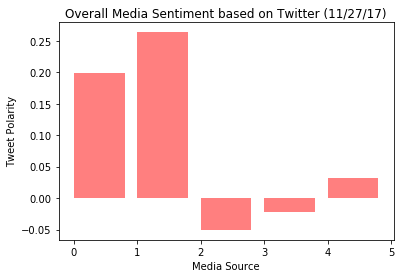

In [31]:
# Build a bar chart

# Set x axis and tick locations
# x_axis = np.arange(len(rain_df))
# tick_locations = [value+0.4 for value in x_axis]

# plt.figure(figsize=(20,3))
# plt.bar(x_axis, rain_df["Inches"], color='r', alpha=0.5, align="edge")
# plt.xticks(tick_locations, rain_df["State"], rotation="vertical")

# Set x axis and tick locations
x_axis = np.arange(len(compounds_df))
#tick_locations = [value+0.4 for value in x_axis]

# Set title and axis labels
plt.title(f'Overall Media Sentiment based on Twitter ({now})')
plt.xlabel("Media Source")
plt.ylabel("Tweet Polarity")

# Create bar chart
plt.bar(x_axis, compounds_df["Average Compound Score"], color='r', alpha=0.5, align="edge")
#plt.xticks(tick_locations, compounds_df.index())

plt.show()

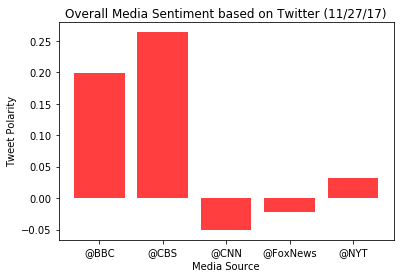

In [30]:
## Try again without a new dataframe
### WORKS! Need to add color mapping
## CSV and PNG

# Set x axis and tick locations
x_axis = np.arange(sentiments_pd["News Org"].nunique())
tick_locations = [value+0.4 for value in x_axis]

# Set title and axis labels
plt.title(f'Overall Media Sentiment based on Twitter ({now})')
plt.xlabel("Media Source")
plt.ylabel("Tweet Polarity")

# Create bar chart
plt.bar(x_axis, sentiments_pd.groupby("News Org").mean()["Compound"], color='r', alpha=0.5, align="edge")
plt.xticks(tick_locations, sentiments_pd["News Org"].unique())

plt.show()